In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-systems-predator)

We encode the predator–prey equations via a function.

In [2]:
def predprey(t, u):
    y, z = u                        # rename for convenience
    s = (y * z) / (1 + beta * y)    # appears in both equations
    return array([y * (1 - alpha * y) - s, -z + s])

As before, the ODE function must accept three inputs, `u`, `p`, and `t`, even though in this case there is no explicit dependence on `t`. The second input is used to pass parameters that don't change throughout a single instance of the problem.

To specify the IVP we must also provide the initial condition, which is a 2-vector here, and the interval for the independent variable. These are given in the call to `solve_ivp`.

In [3]:
from scipy.integrate import solve_ivp
u0 = array([1, 0.01])
tspan = [0.0, 80.0]
alpha, beta = 0.1, 0.25
sol = solve_ivp(predprey, tspan, u0, dense_output=True)
print(f"solved with {sol.y.shape[1]} time steps")

solved with 102 time steps


As in scalar problems, the solution object has fields `t` and `y` that contain the values of the independent and dependent variables, respectively. Each row of `y` represents one component of the solution at every time step, and each column of `y` is the entire solution vector at one time step. Since we used `dense_output=True`, there is also a method `sol` that can be used to evaluate the solution at any time.

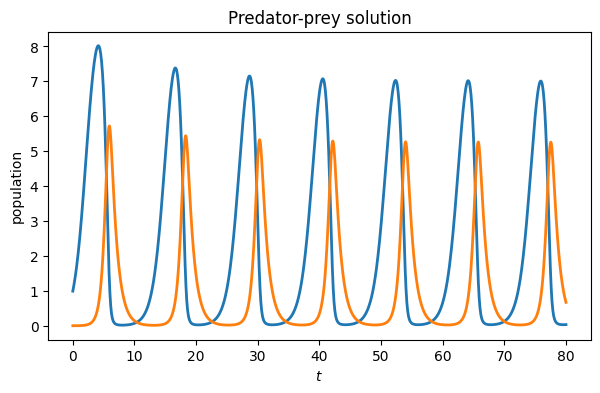

In [4]:
t = linspace(0, 80, 1200)
u = vstack([sol.sol(t[i]) for i in range(t.size)]).T    # same shape as sol.y
fig, ax = subplots()
ax.plot(t, u[0, :], label="prey")
ax.plot(t, u[1, :], label="predator")
xlabel("$t$"), ylabel("population")
title(("Predator-prey solution"));

We can also use {numref}`Function {number} <function-euler>` to find the solution.

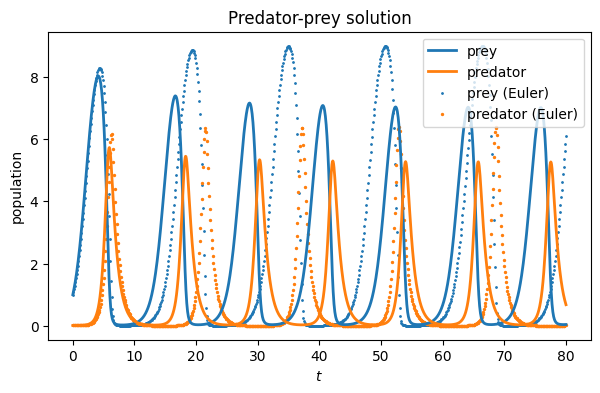

In [5]:
t_E, u_E = FNC.euler(predprey, tspan, u0, 800)
ax.scatter(t_E, u_E[0, :], label="prey (Euler)", s=1)
ax.scatter(t_E, u_E[1, :], label="predator (Euler)", s=2)
ax.legend()
fig

You can see above that the Euler solution is not very accurate. When the solution has two components, it's common to plot the it in the _phase plane_, i.e., with $u_1$ and $u_2$ along the axes and time as a parameterization of the curve.

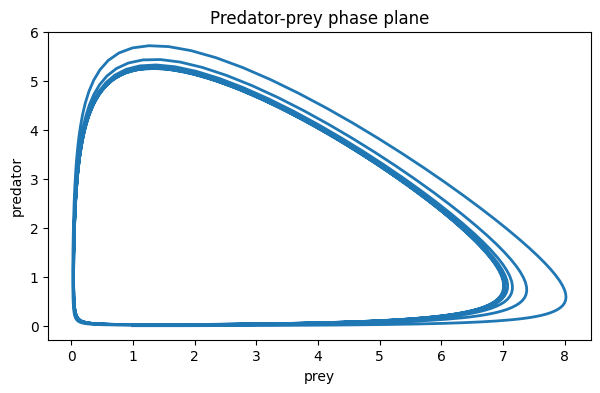

In [6]:
plot(u[0, :], u[1, :])
xlabel("prey"), ylabel("predator")
title(("Predator-prey phase plane"));

From this plot we can see that the solution approaches a periodic one, which in the phase plane is represented by a closed path.